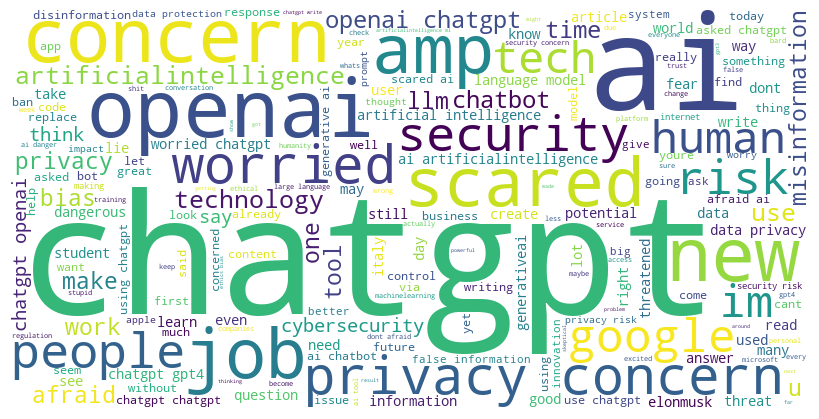

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re  

# Load the dataset
df = pd.read_csv('final_fear_dataset.csv')

# Filter rows where 'fear?' column is '1'
fear_data = df[df['fear?'] == 1]
texts = fear_data['processed_text'].astype(str)

# Convert to lowercase
texts = texts.str.lower()

# Remove URLs
texts = texts.apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x))

# Remove punctuation
texts = texts.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Import stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
texts = texts.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Combine all texts into one large string
all_text = ' '.join(texts)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('word_cloud_for_fear.png')
plt.show()
